<a href="https://colab.research.google.com/github/dcsgod/sentimentanalysisIBM/blob/main/sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report


**IMPORTING DATA & PREPROCESSING**

In [ ]:
# Load the dataset
df = pd.read_csv('Copy of Restaurant_Reviews.csv')

# Check the dataset
df.head()


**DATA VISUALISATION**

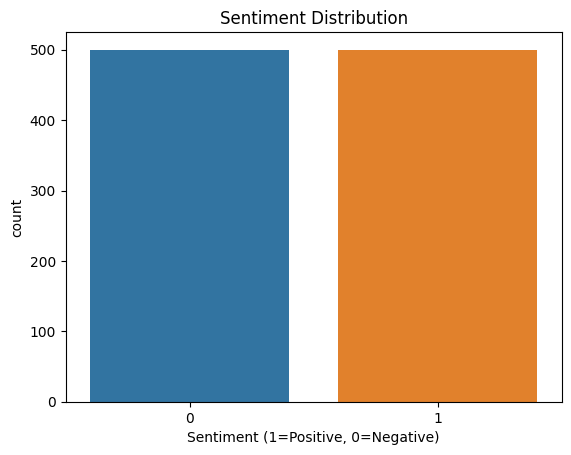

In [4]:
# Countplot for sentiment distribution
sns.countplot(data=df, x='Liked')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (1=Positive, 0=Negative)')
plt.show()


**TEXT VECTORISATION**

In [5]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['Review'])
y = df['Liked']


**SPLITING THE DATASET**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**TRAIN A SENTIMENT ANALYSIS MODEL**

In [7]:
# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

**EVALUATE THE MODEL**

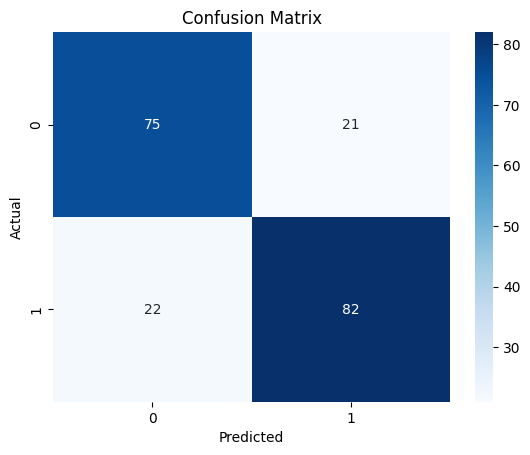

              precision    recall  f1-score   support

           0       0.77      0.78      0.78        96
           1       0.80      0.79      0.79       104

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.79      0.79      0.79       200



In [8]:
# Predict sentiment on the test set
y_pred = nb_classifier.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(report)


**MAKE PREDICTION**

In [9]:
new_reviews = ["The food was amazing!", "Terrible service, never going back."]
X_new = tfidf_vectorizer.transform(new_reviews)
predictions = nb_classifier.predict(X_new)

for review, sentiment in zip(new_reviews, predictions):
    print(f"Review: '{review}'\nSentiment: {'Positive' if sentiment == 1 else 'Negative'}\n")


Review: 'The food was amazing!'
Sentiment: Positive

Review: 'Terrible service, never going back.'
Sentiment: Negative



**CUSTOM INPUT ANALYSIS**

In [11]:
new_reviews = input("Write the Review")
X_new = tfidf_vectorizer.transform([new_reviews])
predictions = nb_classifier.predict(X_new)

for review, sentiment in zip(new_reviews, predictions):
    print(f"Review: '{review}'\nSentiment: {'Positive' if sentiment == 1 else 'Negative'}\n")


Write the Reviewgood taste
Review: 'g'
Sentiment: Positive

